how you might go about doing simple interactive trace identification

In [1]:
 # need notebook backend for interaction
%matplotlib notebook

from matplotlib.widgets import Cursor

import numpy as np
import matplotlib.pyplot as plt


# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

'0.04'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


<IPython.core.display.Javascript object>


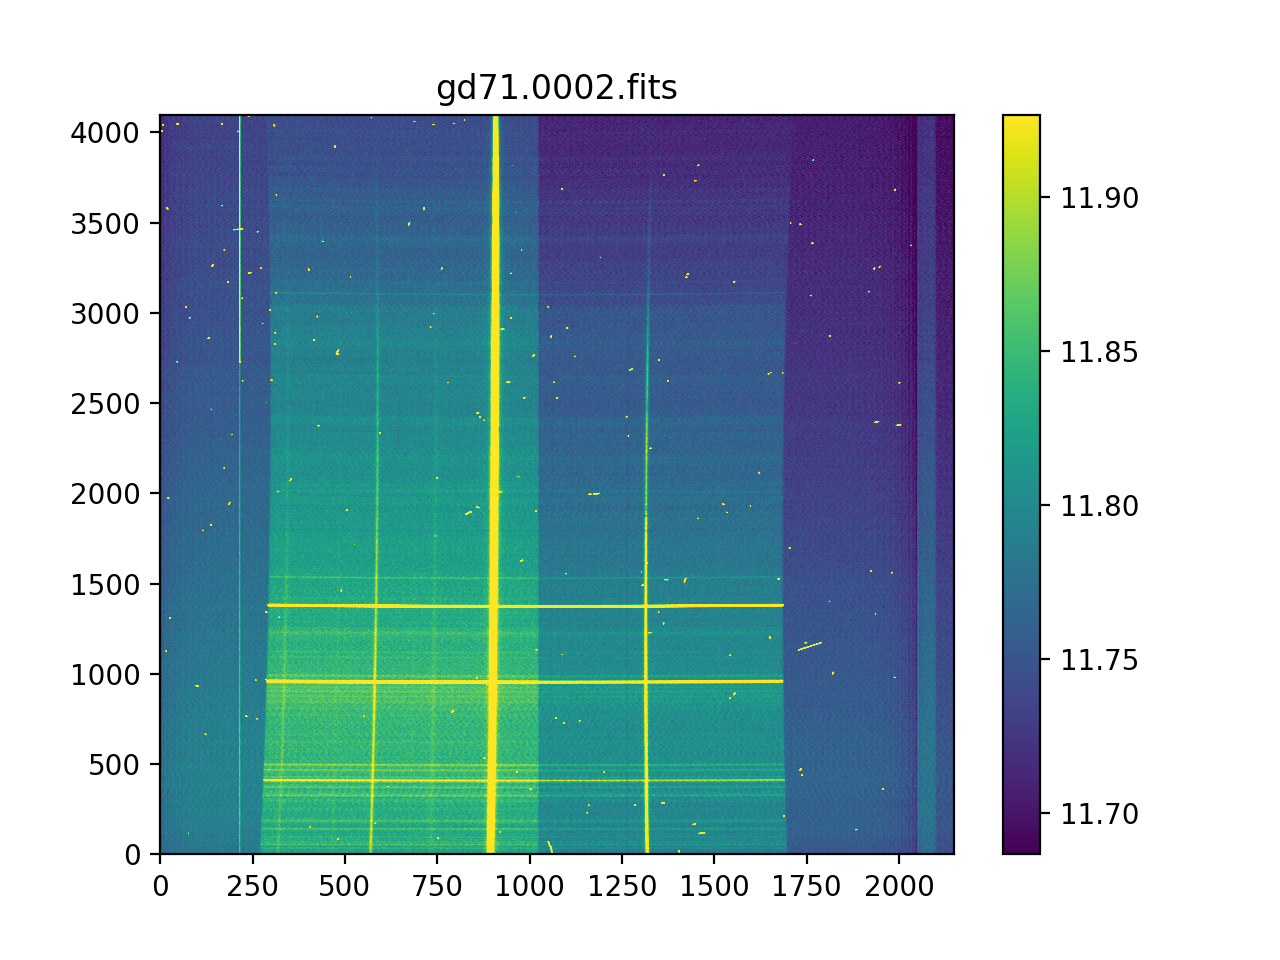

Text(0.5, 1.0, 'gd71.0002.fits')

In [2]:
fdir = '/Users/james/Dropbox/research_projects/kosmos-testing/UT211008/'
fcal = 'gd71.0002.fits'  # spectrum of standard star, GD71
calimg = kosmos.proc(fdir+fcal, bias=None, ilum=None, flat=None, trim=False, Waxis=0)

plt.imshow(calimg, origin='lower', aspect='auto')
plt.clim(np.percentile(calimg, (5, 98)))
cb = plt.colorbar()
plt.title(fcal)

In [9]:
def ap_interac(xpixel, yflux):
    """
    interactively pick the target to then do your aperture trace on

    Parameters
    ----------
    xpixel
    yflux

    Returns
    -------
    x position that has been clicked on
    """
    class InteracTrace(object):
        def __init__(self):
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(111)
            self.ax.plot(xpixel, yflux)
            plt.ylabel('Counts (Image summed in Wavelength direction)')
            plt.xlabel('Spatial Pixel')
            plt.title('Click on object!')

            self.cursor = Cursor(self.ax, useblit=True, horizOn=False,
                                 color='red', linewidth=1)
            self.connect = self.fig.canvas.mpl_connect
            self.disconnect = self.fig.canvas.mpl_disconnect
            self.ClickID = self.connect('button_press_event', self.__onclick__)

            return

        def __onclick__(self, click):
            # https://github.com/matplotlib/matplotlib/issues/15438
            if self.ax.figure.canvas.manager.toolbar.mode == '':
                self.xpoint = click.xdata
                self.ypoint = click.ydata
                self.ax.vlines(self.xpoint, np.nanmin(yflux), np.nanmax(yflux),
                               color='r', lw=3, alpha=0.5)
                
                self.disconnect(self.ClickID)  # disconnect from event
                self.cursor.disconnect_events()
                self.cursor._update()
                self.plt.close()  # close window when clicked
                return self.xpoint, self.ypoint
            else:
                pass

    theclick = InteracTrace()
    plt.show()

    return theclick


In [7]:
Waxis=0

fluxes = np.nansum(calimg.data, axis=Waxis) / calimg.shape[Waxis]
pixels = np.arange(len(fluxes))

<IPython.core.display.Javascript object>


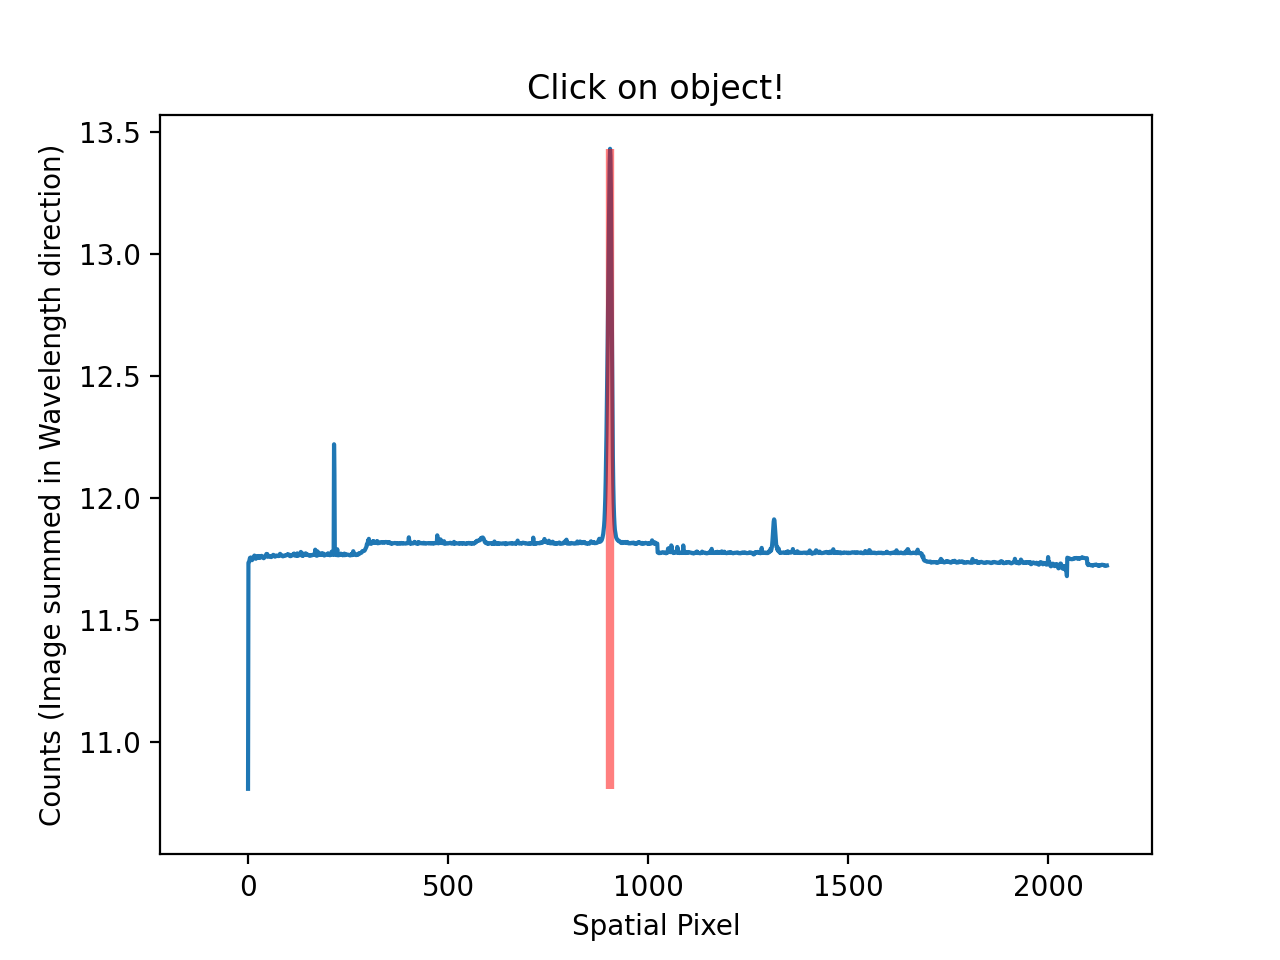

In [10]:
guess1 = ap_interac(pixels, fluxes)

In [12]:
guess1.xpoint

904.7646295362902

<IPython.core.display.Javascript object>


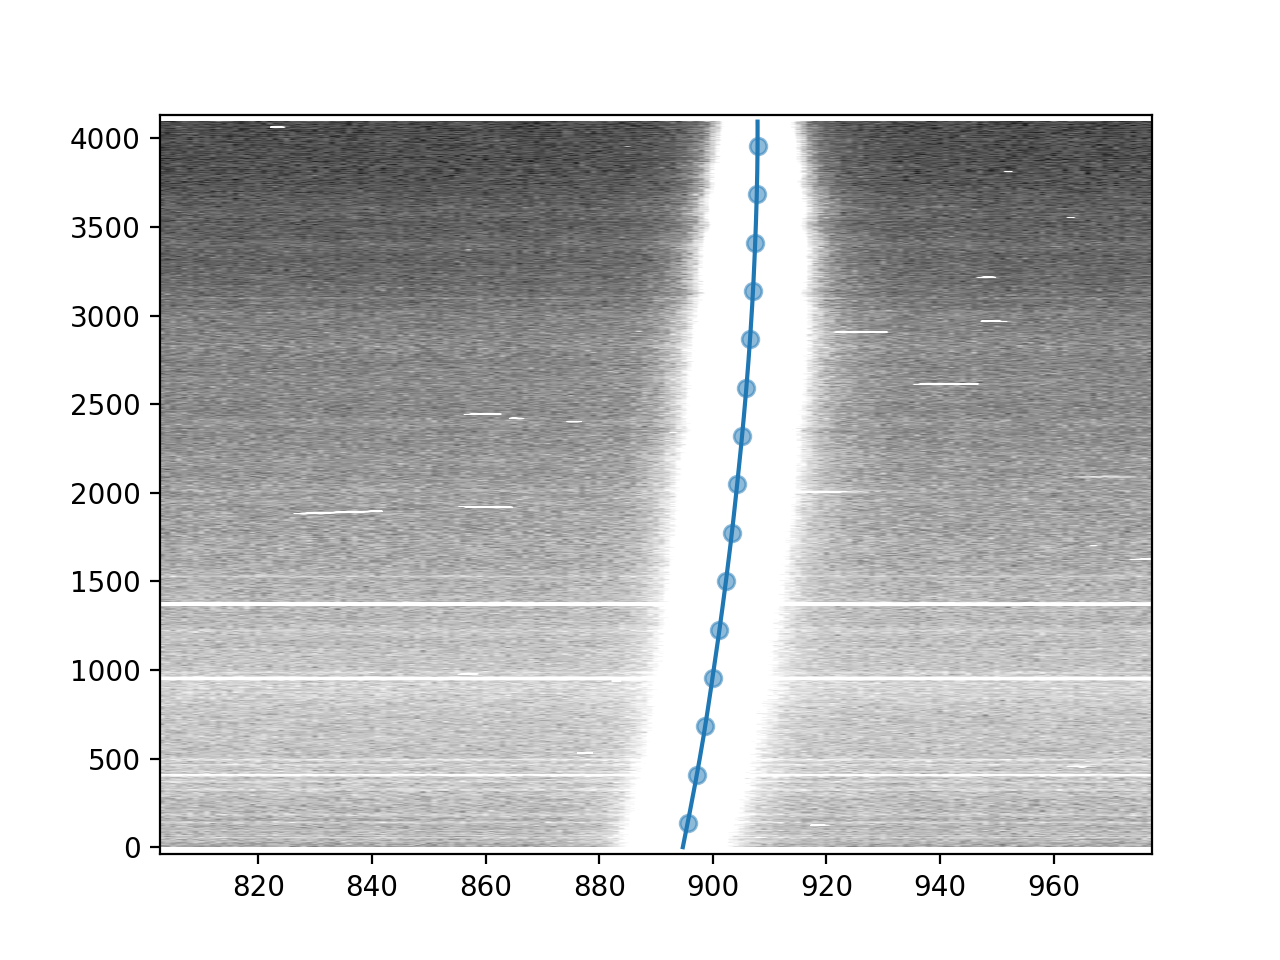

In [14]:
cal_trace = kosmos.trace(calimg, display=True, nbins=15, Waxis=0, guess = guess1.xpoint)

